In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Replace these filenames with the correct paths to your pickle files.
file0 = 'data/nina_measurements0pi1-1.pkl'
file1 = 'data/nina_measurementspi-1.pkl'
file2 = 'data/nina_measurements_31_1-1.pkl'

# Load the data from the pickle files
data0 = load_pickle_data(file0)
data1 = load_pickle_data(file1)
data2 = load_pickle_data(file2)

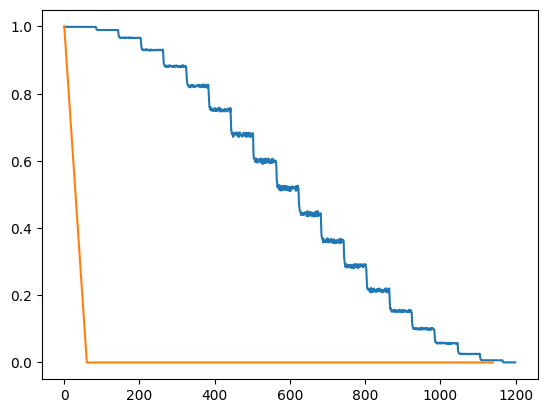

In [6]:
# plot data2
plt.plot(data2[3], label='data2')

# put into 20 bins
bins = np.linspace(0, 1200, 21)
hist, _ = np.histogram(data2[3], bins=bins)
hist = hist / np.sum(hist)
plt.plot(bins[:-1], hist, label='data2 histogram')


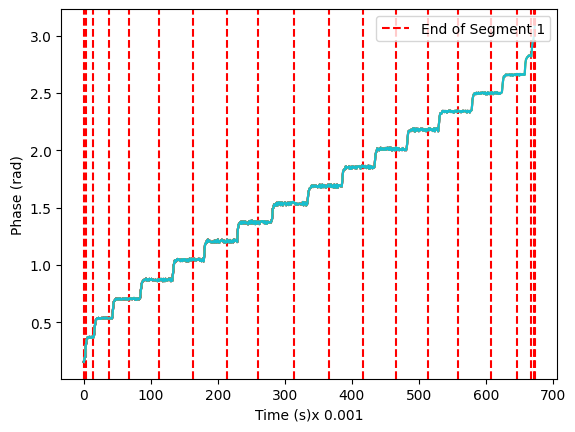

In [7]:
data_2 = []
data_time_bins = []
for i in range(20):
    for j in range(1, 60):
        if abs(data2[3][60 * i + j] - data2[3][60 * i + j - 1]) > 0.001:
            data_2.append(2 * np.arccos(np.sqrt(data2[3][60 * i + j])))
    
    # Plot the data
    plt.plot(data_2)
    
    # Add a vertical line at the end of each iteration
    plt.axvline(x=len(data_2), color='red', linestyle='--', label=f"End of Segment {i + 1}" if i == 0 else None)

# Add labels and legend
plt.xlabel("Time (s)x 0.001")
plt.ylabel("Phase (rad)")
plt.legend(loc="upper right")
plt.show()

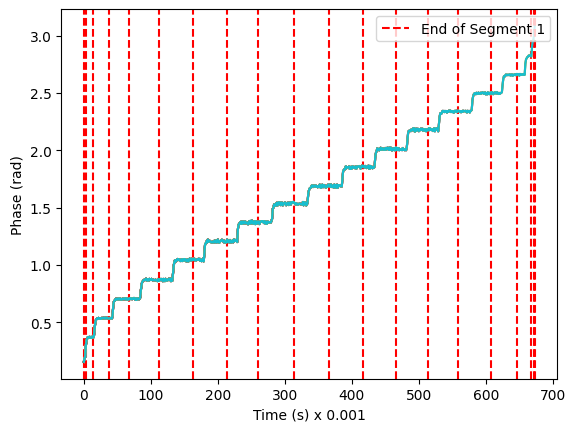

Bin Edges: [0.2 0.8]
Bin Width: 0.6000000000000001


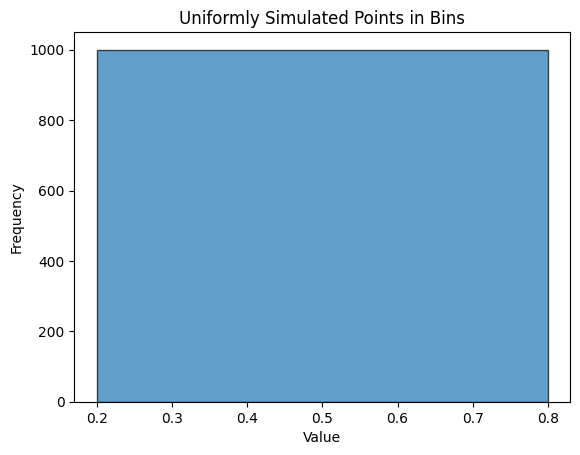

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load pickle data
def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Load the data from file2
file2 = 'data/nina_measurements_31_1-1.pkl'
data2 = load_pickle_data(file2)

# Extract relevant data
time_unit = data2[0]  # Time unit (s)
start_phases = data2[1]  # Starting phases
end_phases = data2[2]  # Final phases
normalized_powers = data2[3]  # Normalized output powers (1x60 for each measurement)

# Step 1: Store time bins for each measurement
data_time_bins = []
data_2 = []

for i in range(20):  # Loop through 20 measurements
    temp_time_bin = []
    for j in range(1, 60):  # Loop through 60 time samples per measurement
        if abs(normalized_powers[60 * i + j] - normalized_powers[60 * i + j - 1]) > 0.001:
            data_2.append(2 * np.arccos(np.sqrt(normalized_powers[60 * i + j])))
            temp_time_bin.append(2 * np.arccos(np.sqrt(normalized_powers[60 * i + j])))
    
    # Store the time bin for the current segment
    data_time_bins.append(temp_time_bin)

    # Plot the data
    plt.plot(data_2)
    
    # Add a vertical line at the end of each iteration
    plt.axvline(x=len(data_2), color='red', linestyle='--', label=f"End of Segment {i + 1}" if i == 0 else None)

# Add labels and legend
plt.xlabel("Time (s) x 0.001")
plt.ylabel("Phase (rad)")
plt.legend(loc="upper right")
plt.show()

# Step 2: Function to determine time bins for discrete classical data points
def determine_time_bins(data, a, b, max_bins=10):
    """
    Determine time bins for discrete classical data points from interval [a, b].
    Maximizes the length of bins based on the data.

    Parameters:
        data (array-like): The data points to bin.
        a (float): Start of the interval (0 <= a).
        b (float): End of the interval (b <= 1).
        max_bins (int): Maximum number of bins to consider.

    Returns:
        bin_edges (list): The edges of the bins.
        bin_width (float): The width of each bin.
    """
    if not (0 <= a < b <= 1):
        raise ValueError("Interval [a, b] must satisfy 0 <= a < b <= 1.")
    
    # Filter data points within the interval [a, b]
    data = np.array(data)
    data_in_interval = data[(data >= a) & (data <= b)]
    
    if len(data_in_interval) == 0:
        raise ValueError("No data points found in the interval [a, b].")
    
    # Determine the maximum bin width while ensuring all data points are covered
    best_bin_width = 0
    best_bin_edges = []
    
    for num_bins in range(1, max_bins + 1):
        bin_edges = np.linspace(a, b, num_bins + 1)
        bin_width = bin_edges[1] - bin_edges[0]
        
        # Check if all data points fall within the bins
        if np.all((data_in_interval >= bin_edges[0]) & (data_in_interval <= bin_edges[-1])):
            if bin_width > best_bin_width:
                best_bin_width = bin_width
                best_bin_edges = bin_edges
    
    return best_bin_edges, best_bin_width

# Step 3: Maximize bin length based on normalized powers
normalized_powers_flat = np.array(normalized_powers).flatten()  # Flatten the 1x60 data
bin_edges, bin_width = determine_time_bins(normalized_powers_flat, a=0.2, b=0.8)

print("Bin Edges:", bin_edges)
print("Bin Width:", bin_width)

# Step 4: Simulate uniform distribution of points in bins
def simulate_uniform_points(bin_edges, num_points_per_bin=1000):
    """
    Simulate a uniform distribution of points in bins around classical data points.

    Parameters:
        bin_edges (list): The edges of the bins.
        num_points_per_bin (int): Number of uniformly sampled points per bin.

    Returns:
        simulated_points (array): Uniformly sampled points across all bins.
    """
    simulated_points = []
    for i in range(len(bin_edges) - 1):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i + 1]
        points = np.linspace(bin_start, bin_end, num_points_per_bin)
        simulated_points.extend(points)
    return np.array(simulated_points)

# Simulate points for the determined bins
simulated_points = simulate_uniform_points(bin_edges, num_points_per_bin=1000)

# Plot the simulated points
plt.hist(simulated_points, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Uniformly Simulated Points in Bins")
plt.show()

In [12]:
data_time_bins

[[],
 [0.1537370699326419, 0.18195371571342744, 0.19598937945493053],
 [0.2945663738061746,
  0.340581859762385,
  0.3575691446022727,
  0.3689397523922608,
  0.37113518976366594,
  0.3653483006530633,
  0.3723058517364352,
  0.3666609795778006,
  0.36313537036333443,
  0.3643310347479643,
  0.37505631183647375],
 [0.3656066683896907,
  0.3738231681753193,
  0.4338292055259005,
  0.4919843308578651,
  0.5184081227898462,
  0.528643223810684,
  0.5345243114460032,
  0.5302181626357518,
  0.5377112042246598,
  0.5324032428838747,
  0.5354311321799682,
  0.528719202316874,
  0.5314258308039727,
  0.5380741145834089,
  0.533133572325086,
  0.5391039082293341,
  0.5351925312500827,
  0.5409808788624445,
  0.5292874618050807,
  0.5384142861904718,
  0.5390992499967235,
  0.5389157770495606,
  0.532834014796919],
 [0.5310782543708406,
  0.5331859491953758,
  0.537384508808995,
  0.5332216539587779,
  0.5312372418675553,
  0.5302995030813683,
  0.5658025384400117,
  0.6524470797051616,
  0.682